In [1]:
# notebook to obtain results for top row of Figure 9 of https://arxiv.org/pdf/2508.05390v1

In [2]:
from pytket.extensions.qiskit import AerStateBackend
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def run_vqe():
    """
    Function to perform a variational quantum eigensolver simulation, which can use random initial parameters. Can be state-vector-only. 
    - see https://docs.quantinuum.com/inquanto/api/inquanto/express.html#inquanto.express.run_vqe

    Requires ansatz and hamiltonian objects.

    Note in InQuanto, conversion of hamiltonian dataframe to an Operator object (e.g. InQuanto's QubitOperator) is required. 
    - For information on QubitOperator see https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.QubitOperator

    Returns an object (vqe) containing VQE information as attributes
    - vqe.final_value: optimized value of the objective function
    - vqe.final_parameters: an object (e.g. dictionary) mapping ansatz parameter symbols to optimized parameter values.
    """
    pass


class FermionSpaceAnsatzUCCSD(reference):
    """ 
    Class to build Unitary coupled cluster with singles and doubles excitations (UCCSD), instantiated from a reference which specifies spin orbital occupations.
    
    Should have a method like circuit_resources to return circuit resource estimates.
     - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.circuit_resources

    Should have a method to convert to an InQuanto CircuitAnsatz object. 
    - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.to_CircuitAnsatz
     
    """ 
    def __init__(reference):
        pass
    
    def circuit_resources():
        pass

    def to_CircuitAnsatz():
        pass
    
    pass


class MultiConfigurationState():
    """ 
    Class to build an non-symbolic ansatz object specifying a selected linear combination of occupation configurations.

    Instantiated from a QubitState (dictionary-like object storing configurations and coefficients of a state vector).

    This is the GR method, using externally controlled Given's rotations.
    
    Should have a method to return a non-symbolic circuit representing the state vector
    - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.get_circuit

    See https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.MultiConfigurationState.

    """
    def __init__(QubitState):
        pass

    def get_circuit():
        pass

    pass


class MultiConfigurationStateSparse():
    """ 
    Class to build an non-symbolic ansatz object specifying a selected linear combination of occupation configurations.

    Instantiated from a QubitState (dictionary-like object storing configurations and coefficients of a state vector).

    This is the SSP method, based on Gleinig and Hoefler’s 2021 IEEE paper https://ieeexplore.ieee.org/document/9586240.

    Should have a method to return a non-symbolic circuit representing the state vector
    - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.get_circuit

    See https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.MultiConfigurationStateSparse.

    """
    def __init__(QubitState):
        pass

    def get_circuit():
        pass
    
    pass


class QubitMappingJordanWigner():
    """
    Class representing the mapping from fermions to qubits using the Jordan-Wigner transformation.

    See https://docs.quantinuum.com/inquanto/api/inquanto/mappings.html#inquanto.mappings.QubitMappingJordanWigner
    """
    pass


class ExpectationValue():
    """
    Computable class to evaluate expectation value of Hamiltonian with respect to the ansatz.

    Instantiated from Ansatz and Hamiltonian (as QubitOperator) objects, see
    - https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.QubitOperator
    Should also accept a single configuration (e.g. Hartree-Fock state) to replace ansatz for instantiation (in which case are are no parameters). 

    Should have a method for evaluation in an ideal classical fashion, which takes the parameters of an Ansatz as argument. 

    For more information on InQuanto computables, see 
    - https://docs.quantinuum.com/inquanto/manual/computables_overview.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/computables.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/computables.html#inquanto.computables.atomic.ExpectationValue
    """
    def __init__(ansatz, hamiltonian):
        pass
    
    def default_evaluate(parameters):
        pass

    pass


class SCEOMMatrixComputable():
    """
    Computable class corresponding to the SCEOM matrix. 

    For instantiation arguments and other information, see https://docs.quantinuum.com/inquanto/api/inquanto/computables.html#inquanto.computables.composite.SCEOMMatrixComputable.

    Should have a method for evaluation in an ideal classical fashion, which takes the parameters of an Ansatz as argument and returns a matrix of evaluated elements.
    """
    def __init__():
        pass

    def default_evaluate(parameters):
        pass

    pass

In [3]:
def get_vqe_res(theta_ind):
    jw_map = QubitMappingJordanWigner()

    backend = AerStateBackend()

    angles_list = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]
    qubit_hamiltonian = = pandas.read_csv(f"hams/ham_c2h4_4qubit_angle{angles_list[theta_ind]}.csv")

    hf_state = [1, 1, 0, 0]

    hf_energy = ExpectationValue(hf_state, qubit_hamiltonian).default_evaluate({})
    
    uccsd = FermionSpaceAnsatzUCCSD(fock_space, hf_state)

    vqe = run_vqe(uccsd, qubit_hamiltonian, backend=backend)
    gs_ansatz = uccsd.to_CircuitAnsatz(vqe.final_parameters)

    e_exact = qubit_hamiltonian.eigenspectrum(hf_state.single_term.hamming_weight)  # see https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.QubitOperator.eigenspectrum

    return (
        hf_state,
        hf_energy,
        e_exact,
        gs_ansatz,
        jw_map,
        qubit_hamiltonian,
        vqe
    )


In [4]:
angles_list = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]

hf_data = []
vqe_data = []
diag_data = []
qsceom_data = []

for i, angle in enumerate(angles_list):

    (
        hf_state,
        hf_energy,
        diag_en,
        gs_ansatz,
        jw_map,
        qubit_hamiltonian,
        vqe
    ) = get_vqe_res(i) 

    vqe_energy = vqe.final_value

    excitation_operators = construct_single_excitation_operators(hf_state)
    excitation_operators += construct_double_excitation_operators(hf_state)

    point_group=None

    m = SCEOMMatrixComputable(
        hf_state,
        gs_ansatz,
        jw_map,
        qubit_hamiltonian,
        excitation_operators,
        point_group,
        multi_configuration_preparator_sparse
    )

    M = m.default_evaluate({})
    final_m_matrix = M-np.identity(len(excitation_operators))*vqe_energy #Eq. 19
    ### get excitation energies ###
    if np.allclose(final_m_matrix, np.asmatrix(final_m_matrix).H):
        #print('algorithm_qeom.py: M is Hermitian \n')
        e, c = scipy.linalg.eigh(final_m_matrix)
    else:
        #print('algorithm_qeom.py: M is not Hermitian \n') 
        e, c = scipy.linalg.eig(final_m_matrix)
    ### get energies of excited states ####
    excited_energies = np.sort(e.real) + vqe_energy
    print(f'VQE   : {angle, vqe_energy}')
    print(f'DIAG  : {angle, diag_en}')
    print(f'QSCEOM: {angle, excited_energies}')

    hf_data.append(hf_energy)
    vqe_data.append(vqe_energy)
    diag_data.append(diag_en)
    qsceom_data.append(excited_energies)

# TIMER BLOCK-0 BEGINS AT 2025-09-02 15:17:36.557079
# TIMER BLOCK-0 ENDS - DURATION (s):  0.0678265 [0:00:00.067827]
VQE   : (0, -77.11659290533532)
DIAG  : (0, array([-77.117, -76.94 , -76.94 , -76.94 , -76.596, -76.407]))
QSCEOM: (0, array([-76.94 , -76.596, -76.407]))
# TIMER BLOCK-1 BEGINS AT 2025-09-02 15:17:45.051604
# TIMER BLOCK-1 ENDS - DURATION (s):  0.0632186 [0:00:00.063219]
VQE   : (20, -77.10311001998367)
DIAG  : (20, array([-77.103, -76.943, -76.943, -76.943, -76.623, -76.452]))
QSCEOM: (20, array([-76.943, -76.623, -76.452]))
# TIMER BLOCK-2 BEGINS AT 2025-09-02 15:17:53.468865
# TIMER BLOCK-2 ENDS - DURATION (s):  0.0648738 [0:00:00.064874]
VQE   : (40, -77.06967385411072)
DIAG  : (40, array([-77.07 , -76.955, -76.955, -76.955, -76.672, -76.549]))
QSCEOM: (40, array([-76.955, -76.672, -76.549]))
# TIMER BLOCK-3 BEGINS AT 2025-09-02 15:18:01.669550
# TIMER BLOCK-3 ENDS - DURATION (s):  0.0653962 [0:00:00.065396]
VQE   : (60, -77.02493132508855)
DIAG  : (60, array([-77.

In [6]:
diag_gs = []
for i, angle in enumerate(angles_list):
    diag_gs.append(diag_data[i][0])
print(diag_gs)
print(vqe_data)
print(hf_data)

[np.float64(-77.11659290533561), np.float64(-77.10311001998393), np.float64(-77.06967385411102), np.float64(-77.02493132508863), np.float64(-76.98433575212123), np.float64(-76.97948874021282), np.float64(-76.98433575212115), np.float64(-77.02493132508866), np.float64(-77.06967385411107), np.float64(-77.10311001998382), np.float64(-77.11659290533568)]
[-77.11659290533532, -77.10311001998367, -77.06967385411072, -77.02493132508855, -76.98433575211895, -76.97692960591576, -76.98433575211897, -77.02493132508859, -77.06967385411077, -77.10311001998353, -77.11659290533541]
[-77.07208779770458, -77.06102964714934, -77.02802801200262, -76.97369422783466, -76.89933468493965, -76.85534456853725, -76.8993346849396, -76.97369422783468, -77.02802801200268, -77.06102964714923, -77.07208779770465]


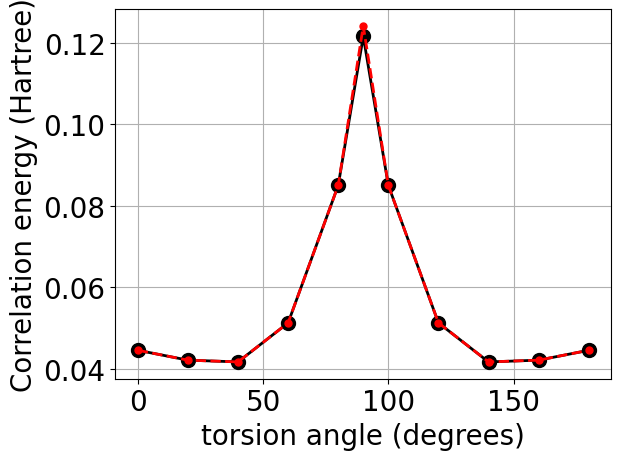

In [7]:
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 20})
fig = plt.figure()
ax = plt.axes()
data = []
HatoeV = 27.2114
plt.plot(angles_list, np.abs(np.subtract(vqe_data, hf_data)), 'k-o', linewidth=2, ms=10)
plt.plot(angles_list, np.abs(np.subtract(diag_gs, hf_data)), 'r--o', linewidth=2, ms=5)

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Abs(VQE-HF)',
                          markerfacecolor='black',lw=2, markersize=10)
                    ,Line2D([0], [0], marker='o', color='red', label='Abs(EIGEN-HF)',
                          markerfacecolor='red', linestyle='--', lw=2, markersize=5)]
plt.grid()
plt.ylabel('Correlation energy (Hartree)')
plt.xlabel('torsion angle (degrees)')
plt.show()

In [8]:
qsceom0 = []
qsceom1 = []
qsceom2 = []

diag_ex1 = []
diag_ex2 = []
diag_ex3 = []
diag_ex4 = []
diag_ex5 = []
for i, angle in enumerate(angles_list):
    qsceom0.append(qsceom_data[i][0])
    qsceom1.append(qsceom_data[i][1])
    qsceom2.append(qsceom_data[i][2])

    diag_ex1.append(diag_data[i][1])
    diag_ex2.append(diag_data[i][2])
    diag_ex3.append(diag_data[i][3])
    diag_ex4.append(diag_data[i][4])
    diag_ex5.append(diag_data[i][5])


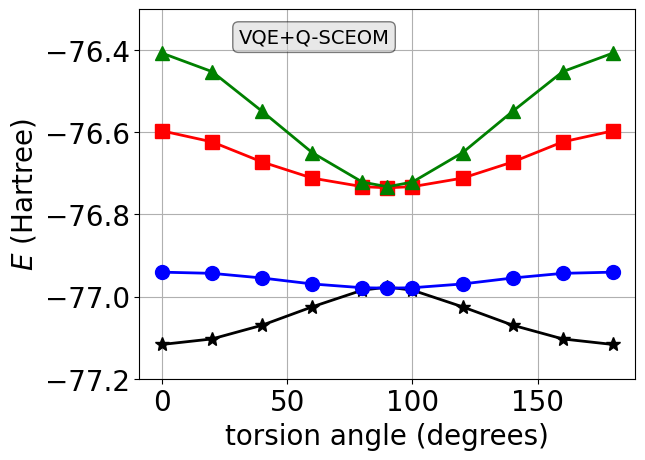

In [9]:
fig = plt.figure()
ax = plt.axes()
data = []
HatoeV = 27.2114
plt.plot(angles_list, vqe_data, 'k-*', linewidth=2, ms=10)
plt.plot(angles_list, qsceom0, 'b-o', linewidth=2, ms=10)
plt.plot(angles_list, qsceom1, 'r-s', linewidth=2, ms=10)
plt.plot(angles_list, qsceom2, 'g-^', linewidth=2, ms=10)

#legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Abs(VQE-HF)',
#                          markerfacecolor='blue',lw=2)]

props = dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
ax.text(0.2, 0.95, 'VQE+Q-SCEOM', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.grid()
plt.ylabel(r'$ E $ (Hartree)')
plt.xlabel('torsion angle (degrees)')
plt.ylim([-77.2, -76.3])
plt.show()

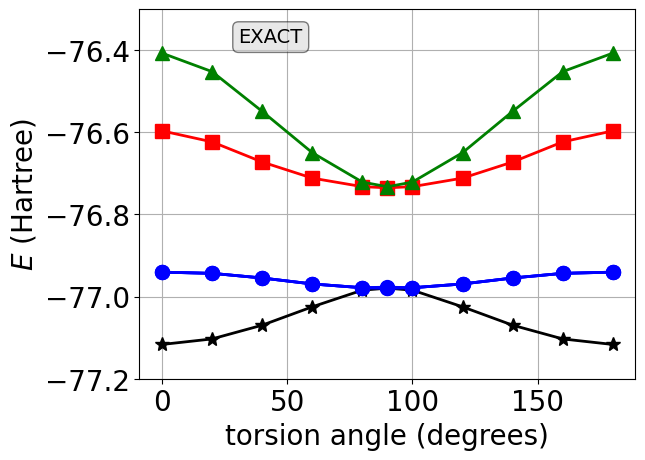

In [10]:
fig = plt.figure()
ax = plt.axes()
data = []
HatoeV = 27.2114
plt.plot(angles_list, diag_gs, 'k-*', linewidth=2, ms=10)
plt.plot(angles_list, diag_ex1, 'b-o', linewidth=2, ms=10) #states in blue are degenerate
plt.plot(angles_list, diag_ex2, 'b-o', linewidth=2, ms=10)
plt.plot(angles_list, diag_ex3, 'b-o', linewidth=2, ms=10)
plt.plot(angles_list, diag_ex4, 'r-s', linewidth=2, ms=10)
plt.plot(angles_list, diag_ex5, 'g-^', linewidth=2, ms=10)

#legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Abs(VQE-HF)',
#                          markerfacecolor='blue',lw=2)]

props = dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
ax.text(0.2, 0.95, 'EXACT', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.grid()
plt.ylabel(r'$ E $ (Hartree)')
plt.xlabel('torsion angle (degrees)')
plt.ylim([-77.2, -76.3])
plt.show()